<a href="https://colab.research.google.com/github/alphabeen/codingnote/blob/main/SumsungDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('005930.KS.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-14,51000,51080,50420,50480,43856.35938,8239000
1,2017-07-17,50900,51020,50520,50640,43995.37891,8976100
2,2017-07-18,50420,50880,50360,50840,44169.13281,7084450
3,2017-07-19,50620,50820,50000,50740,44082.25000,11157500
4,2017-07-20,50760,51320,50560,51200,44481.89063,8367600


Compute Mid Price

In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

Create Windows


In [ ]:
seq_len = 50 #window size
sequence_length = seq_len + 1


result = []
for index in range(len(mid_prices) - sequence_length): 
  result.append(mid_prices[index: index + sequence_length])

Normalize Data


In [ ]:
normalized_data = []
for window in result:
  normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
  normalized_data.append(normalized_window)

result = np.array(normalized_data)
#training set 90% test set 10%
row = int(round(result.shape[0] * 0.9))
train = result[:row,:]
np.random.shuffle(train)

x_train = train[:, :-1] 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
y_train = train[:,-1] 

x_test = result[row:,:-1]
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

x_train.shape, x_test.shape 

((1056, 50, 1), (117, 50, 1))

Build a Model

In [ ]:
model = Sequential() 

model.add(LSTM(50, return_sequences=True,input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop') #mean squared error
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


Training

In [ ]:
model.fit(x_train,y_train, 
          validation_data=(x_test,y_test),
          batch_size=20,
          epochs=200) 

Epoch 1/200
53/53 [==============================] - 4s 31ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 2/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 6.1000e-04
Epoch 3/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 2.6153e-04
Epoch 4/200
53/53 [==============================] - 1s 12ms/step - loss: 8.5256e-04 - val_loss: 3.5820e-04
Epoch 5/200
53/53 [==============================] - 0s 8ms/step - loss: 6.9753e-04 - val_loss: 4.8927e-04
Epoch 6/200
53/53 [==============================] - 0s 8ms/step - loss: 5.8744e-04 - val_loss: 1.9203e-04
Epoch 7/200
53/53 [==============================] - 0s 8ms/step - loss: 5.1636e-04 - val_loss: 2.7051e-04
Epoch 8/200
53/53 [==============================] - 0s 8ms/step - loss: 4.4489e-04 - val_loss: 4.0513e-04
Epoch 9/200
53/53 [==============================] - 0s 8ms/step - loss: 4.3024e-04 - val_loss: 1.4292e-04
Epoch 10/200
53/53 [=============================

Prediction

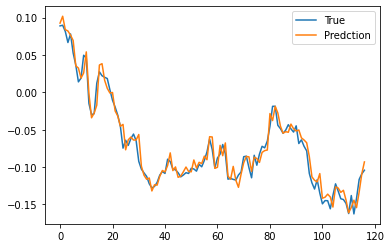

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='Predction')
ax.legend()
plt.show()